<a href="https://colab.research.google.com/github/jeromeslash83/Data-Science/blob/main/NBA_Visualizations%20Boilerplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nba_api


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.7/261.7 kB 4.5 MB/s eta 0:00:00


In [95]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelog, shotchartdetail
from nba_api.stats.endpoints import playergamelog, leaguedashplayerstats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
player_names = ["Luka Doncic", "Stephen Curry", "Nikola Jokic", "Giannis Antetokounmpo", "Joel Embiid", 'Tyrese Haliburton', 'Kevin Durant', "Shai Gilgeous-Alexander", 'Jayson Tatum']
all_players = players.get_players()

# Create a dictionary to store player IDs
player_ids = {name: [player for player in all_players if player['full_name'] == name][0]['id'] for name in player_names}

season = '2023-24'

# Create a dictionary to store each player's shot data DataFrame
player_shot_data_dict = {}

for name, player_id in player_ids.items():
    shot_chart = shotchartdetail.ShotChartDetail(team_id=0, player_id=player_id, season_nullable=season, context_measure_simple='FGA')
    player_shot_data_dict[name] = shot_chart.get_data_frames()[0]
    player_shot_data_dict[name]['Player'] = name

In [100]:
luka = player_shot_data_dict["Luka Doncic"]
Embiid = player_shot_data_dict["Joel Embiid"]
Curry = player_shot_data_dict["Stephen Curry"]
Giannis = player_shot_data_dict["Giannis Antetokounmpo"]
Shai = player_shot_data_dict["Shai Gilgeous-Alexander"]
Jokic = player_shot_data_dict["Nikola Jokic"]
Durant = player_shot_data_dict['Kevin Durant']
Hali = player_shot_data_dict['Tyrese Haliburton']
Tatum = player_shot_data_dict['Jayson Tatum']

In [106]:
season_stats = {}
for name, player_id in player_ids.items():
    stats = playergamelog.PlayerGameLog(player_id=player_id, season='2023-24').get_data_frames()[0]
    season_stats[name] = stats

all_players_adv_stats = leaguedashplayerstats.LeagueDashPlayerStats(season='2023-24', measure_type_detailed_defense='Advanced', per_mode_detailed='PerGame').get_data_frames()[0]

advanced_metrics = {}
for name, player_id in player_ids.items():
    player_adv_stats = all_players_adv_stats[all_players_adv_stats['PLAYER_ID'] == player_id]
    advanced_metrics[name] = player_adv_stats

In [107]:
combined_data = []

for player in season_stats.keys():
    # Convert each player's season stats and advanced metrics into DataFrames
    season_df = pd.DataFrame(season_stats[player])
    season_df['Player'] = player
    advanced_df = pd.DataFrame(advanced_metrics[player])

    # Concatenate the season stats with the advanced metrics for each player
    combined_df = pd.concat([season_df, advanced_df], axis=1)

    # Append the combined DataFrame to the list
    combined_data.append(combined_df)

# Concatenate all players' combined data into a single DataFrame
adv_metrics_df = pd.concat(combined_data, ignore_index=True)

# Convert numeric columns to numeric types
numeric_cols = ['PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'W_PCT' ]  # Add other columns you're interested in
adv_metrics_df[numeric_cols] = adv_metrics_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Compute totals
total_metrics = adv_metrics_df.groupby('Player')[numeric_cols].sum().reset_index()

# Compute averages
average_metrics = adv_metrics_df.groupby('Player')[numeric_cols].mean().reset_index()


In [108]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2):
    if ax is None:
        ax = plt.gca()

    # The hoop
    hoop = Circle((0,-15.5), radius=7.5, linewidth=lw, color=color, fill=False)
    backboard = Rectangle((-30, -25.5), 60, 0.4, linewidth=lw, color=color)

    # The paint
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color, fill=False)
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color, fill=False)

    # Free Throw Top Arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180, linewidth=lw, color=color, fill=False)
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color, linestyle='dashed')


    # Three point line
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw, color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw, color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0, linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0, linewidth=lw, color=color)

    # List of elements to draw on the court
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw, bottom_free_throw, corner_three_a, corner_three_b, three_arc, center_outer_arc, center_inner_arc]

    for element in court_elements:
        ax.add_patch(element)

    # Set the limits for the court in the x and y axis
    ax.set_xlim(-250, 250)
    ax.set_ylim(422.5, -35.5)

    # Remove axis labels and ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Set an aspect ratio that ensures the court is drawn proportionally
    ax.set_aspect('equal')

    return ax

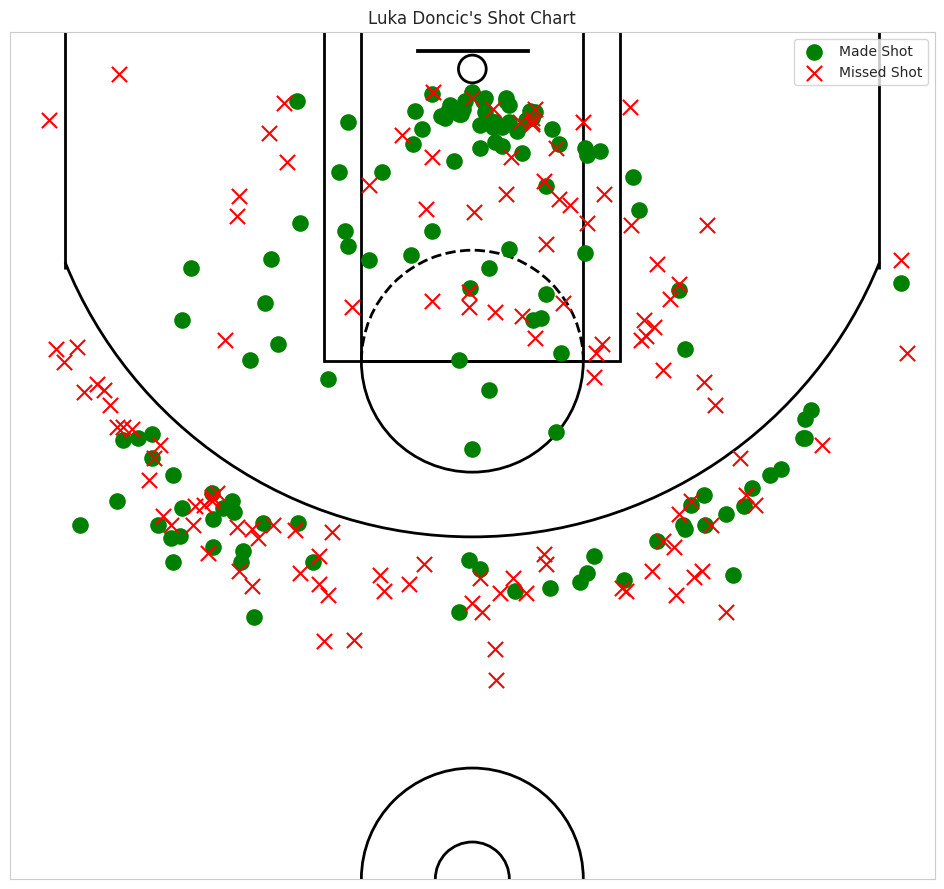

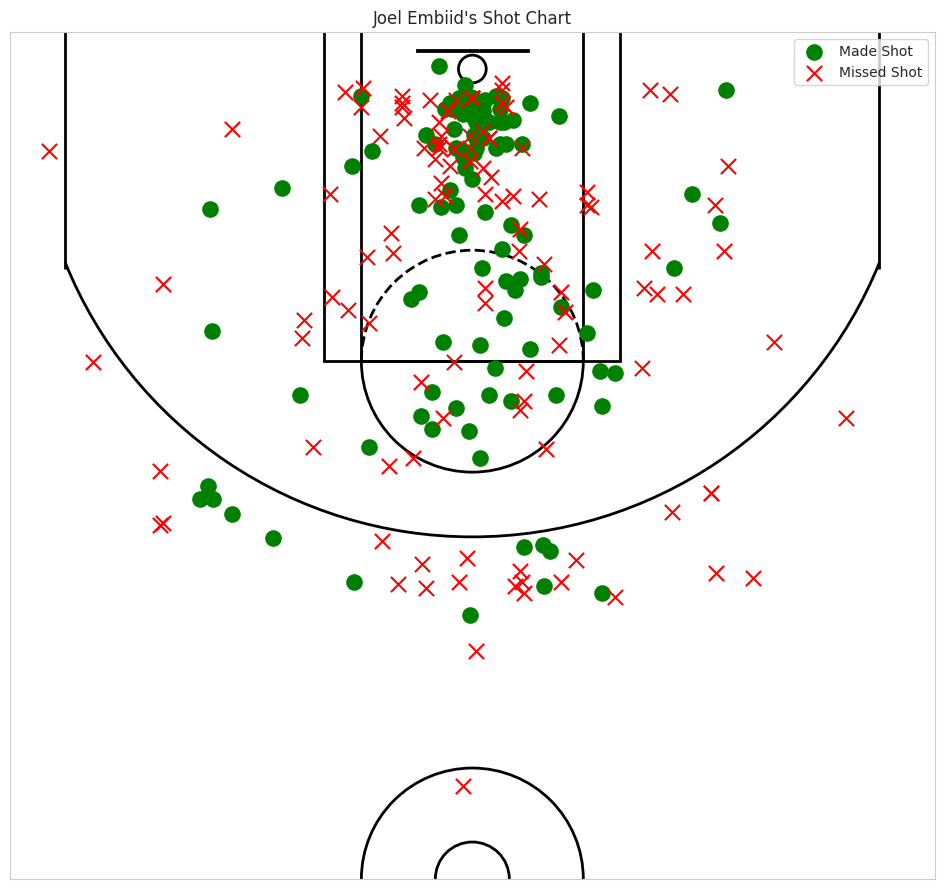

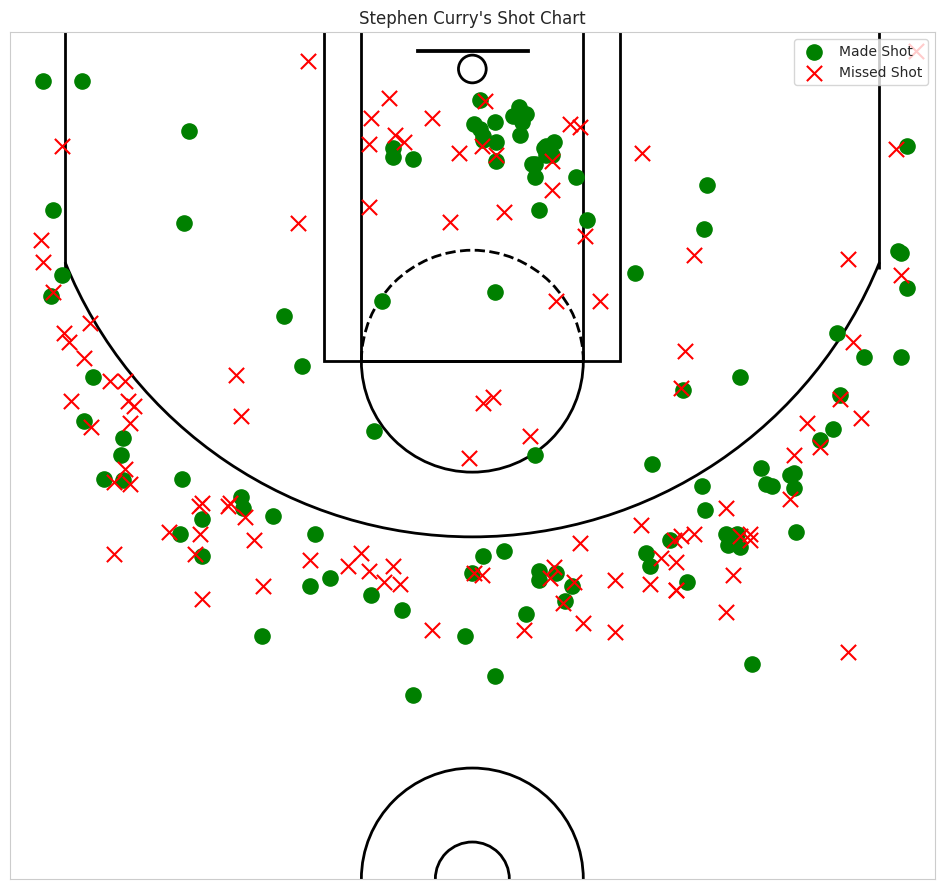

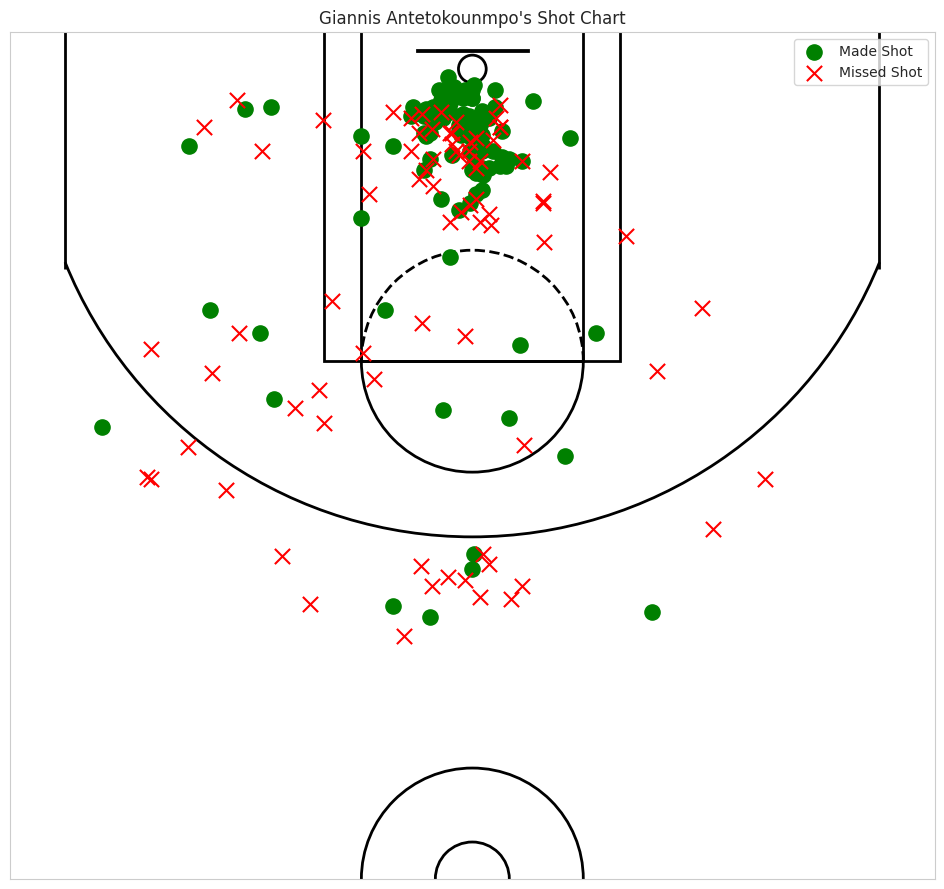

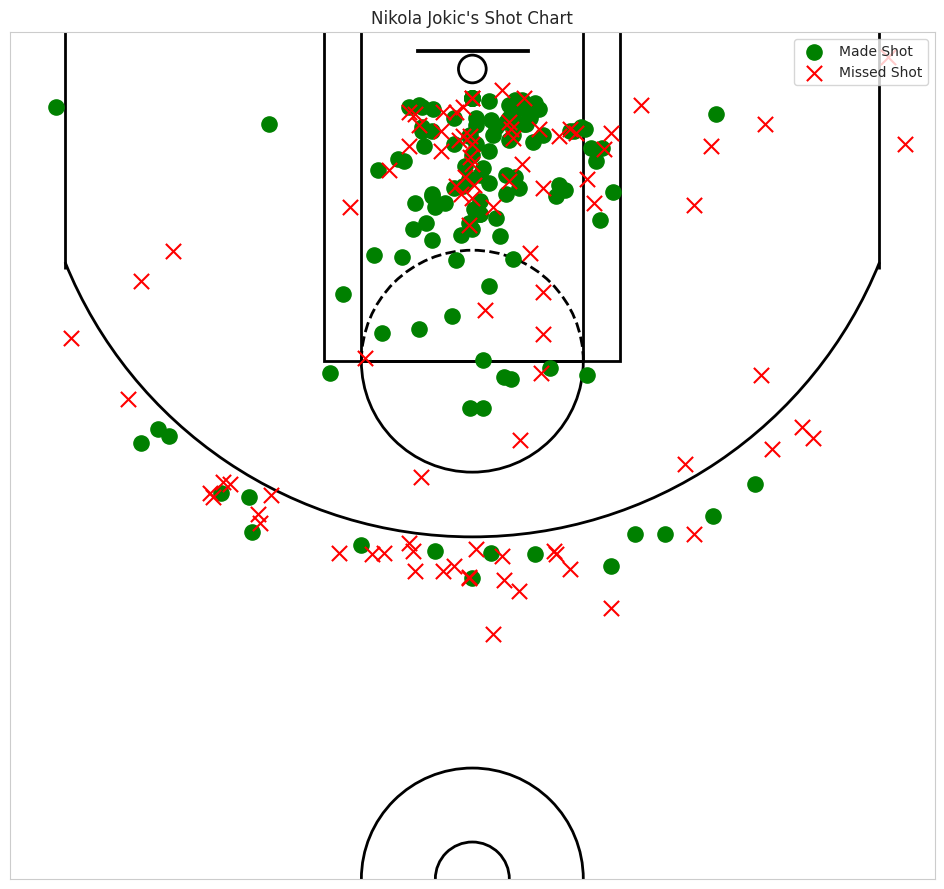

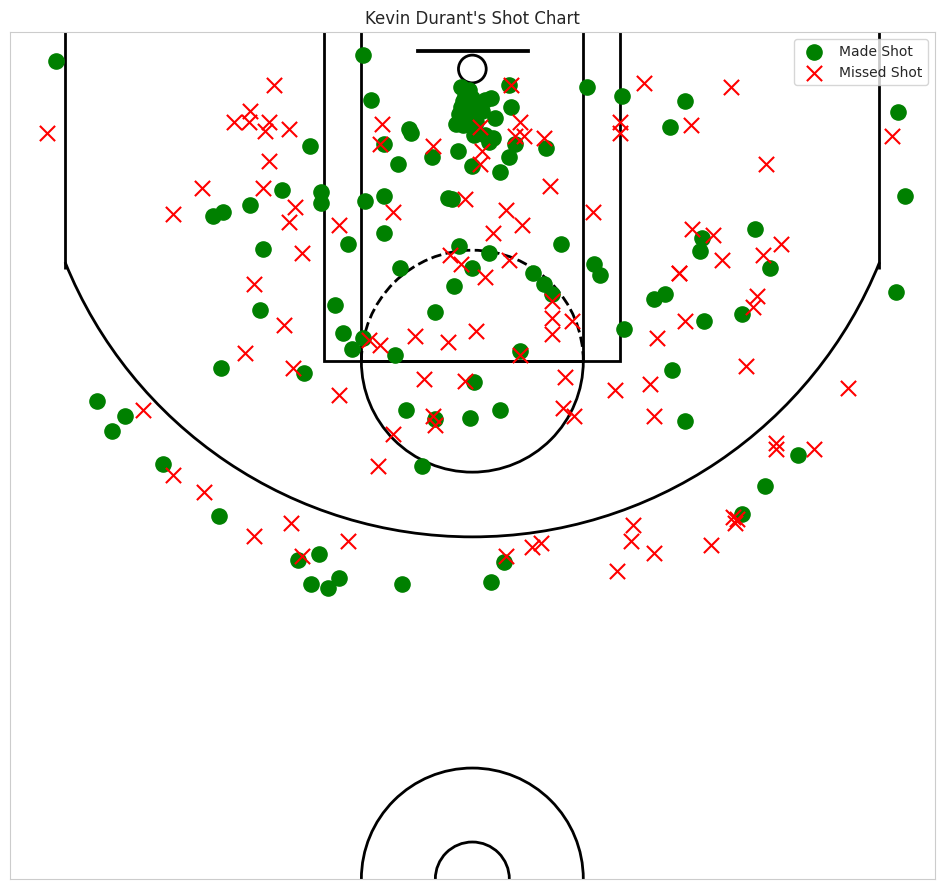

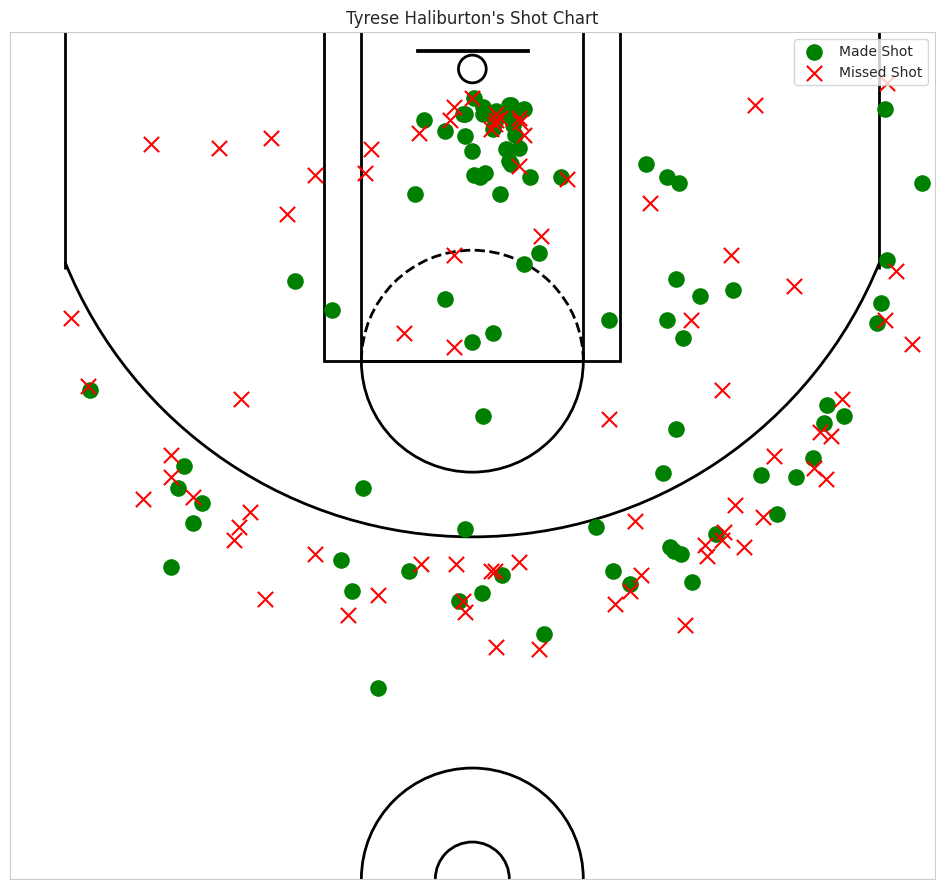

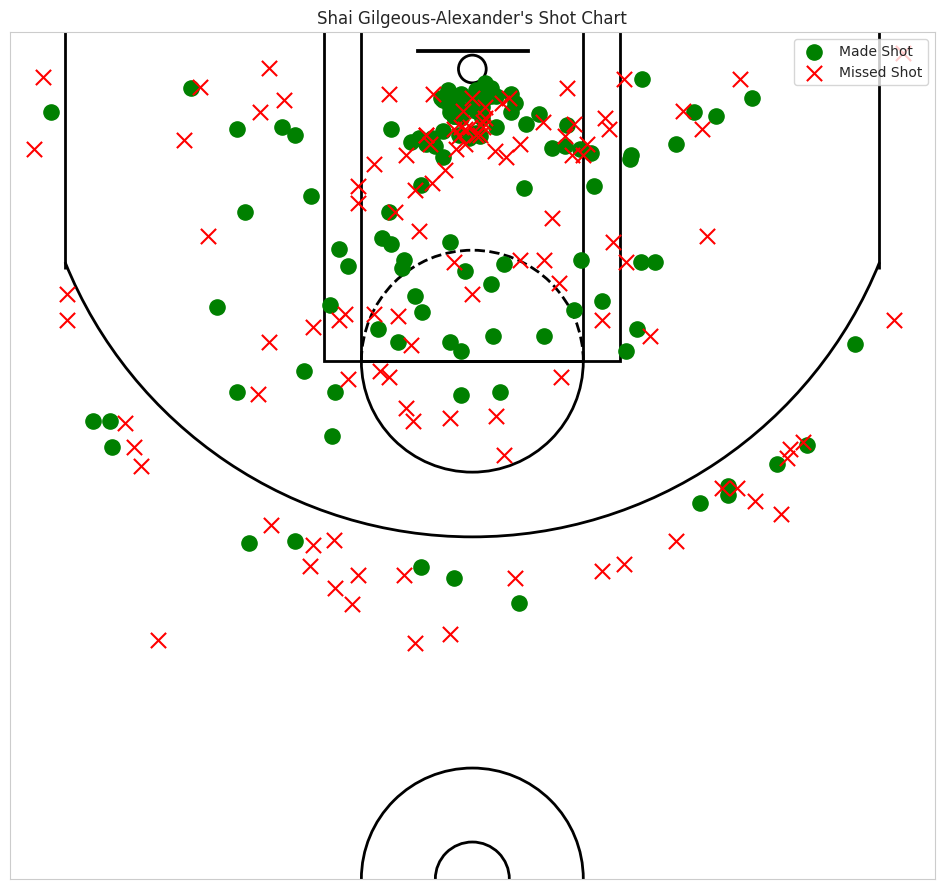

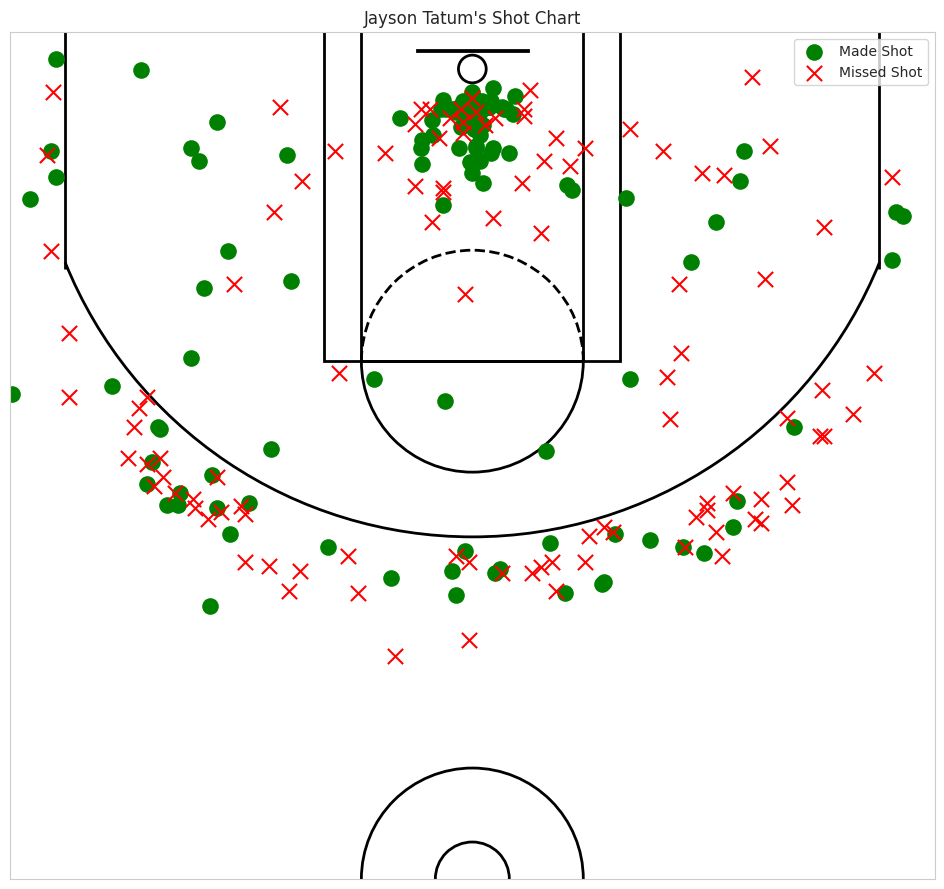

In [115]:
output_dir = '/content/drive/MyDrive/Images/NBA Figs'

# Plot the shot charts for each player
player_shot_data = {
    "Luka Doncic": luka,
    "Joel Embiid": Embiid,
    "Stephen Curry": Curry,
    "Giannis Antetokounmpo": Giannis,
    "Nikola Jokic": Jokic,
    "Kevin Durant": Durant,
    "Tyrese Haliburton": Hali,
    "Shai Gilgeous-Alexander": Shai,
    "Jayson Tatum": Tatum
}

for player_name, shot_data in player_shot_data.items():
    fig, ax = plt.subplots(figsize=(12, 11))
    draw_court(ax)
    made_shots = shot_data[shot_data['SHOT_MADE_FLAG'] == 1]
    missed_shots = shot_data[shot_data['SHOT_MADE_FLAG'] == 0]
    ax.scatter(made_shots['LOC_X'], made_shots['LOC_Y'], marker='o', color='green', s=120, label='Made Shot')
    ax.scatter(missed_shots['LOC_X'], missed_shots['LOC_Y'], marker='x', color='red',s=120, label='Missed Shot')
    ax.set_title(f"{player_name}'s Shot Chart")
    ax.legend(loc='upper right')
    plt.savefig(f'{output_dir}/ Shot Chart of {player_name} for 2023-24 NBA Season.png')
    plt.show()

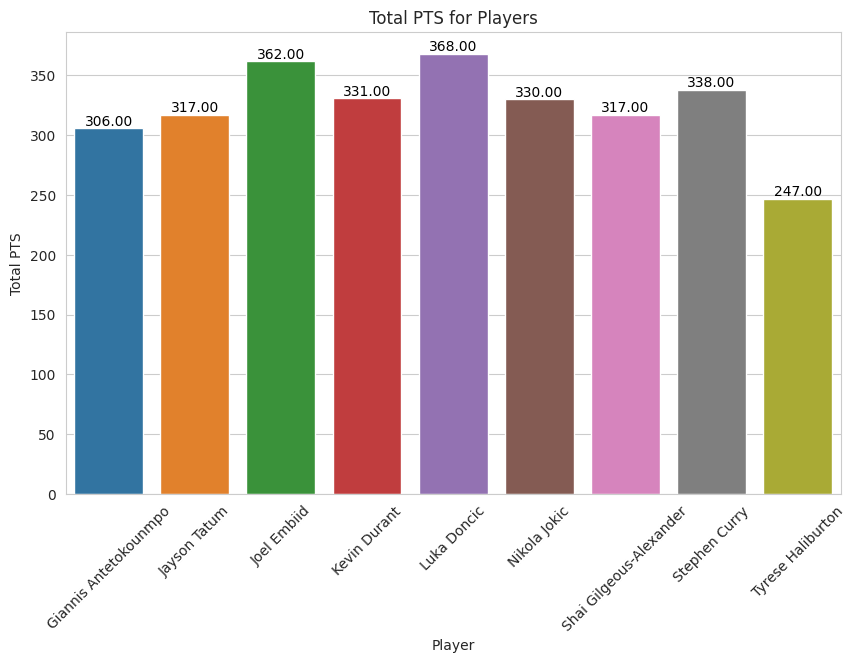

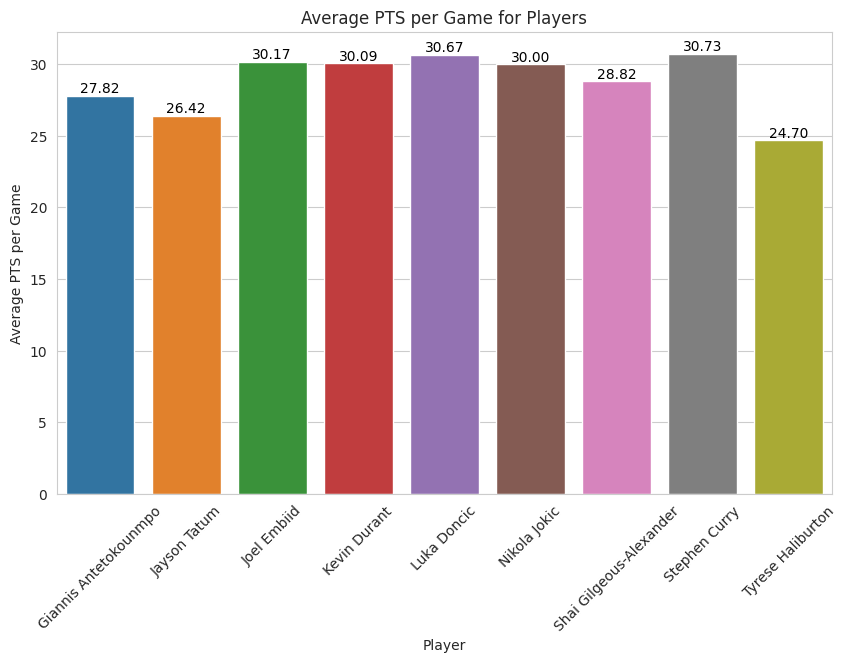

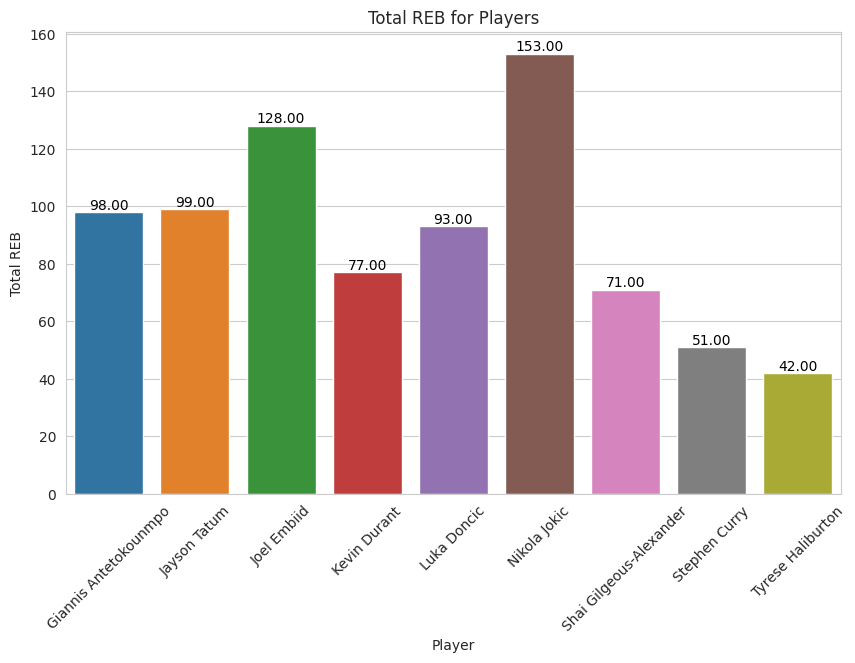

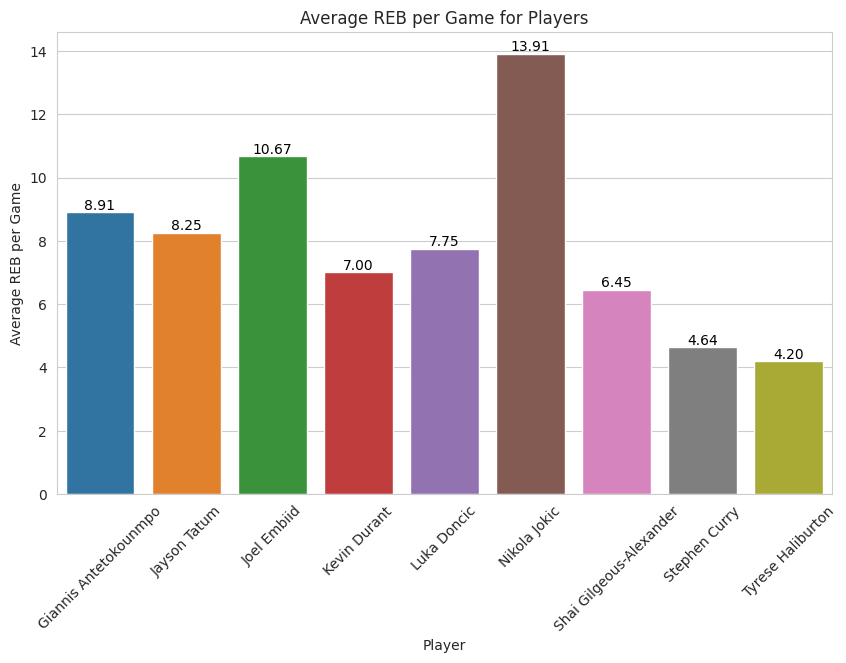

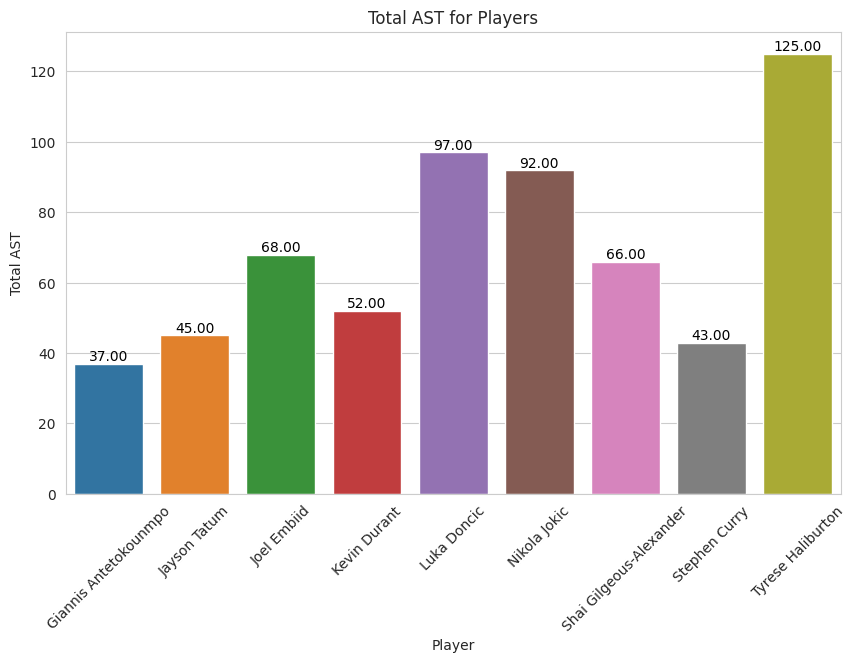

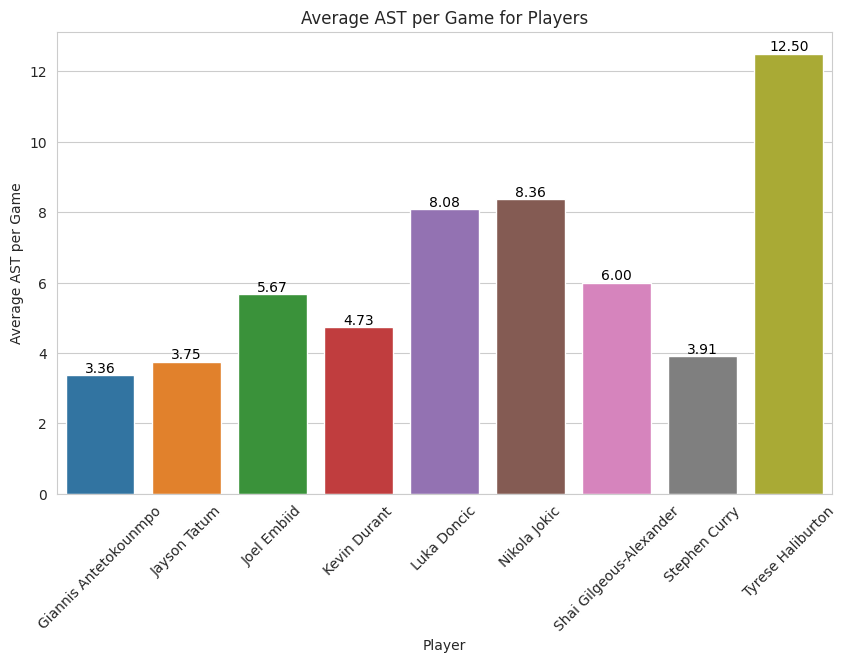

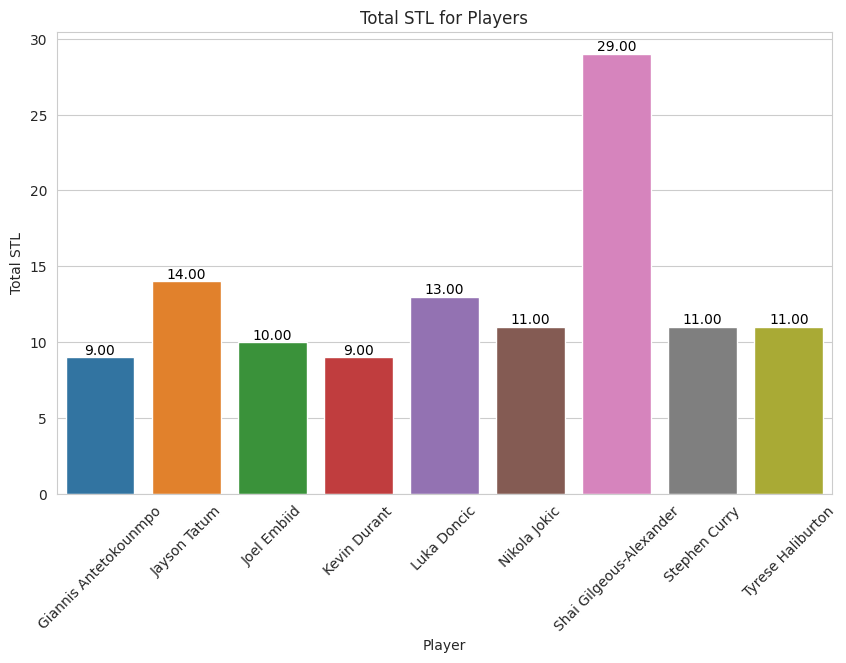

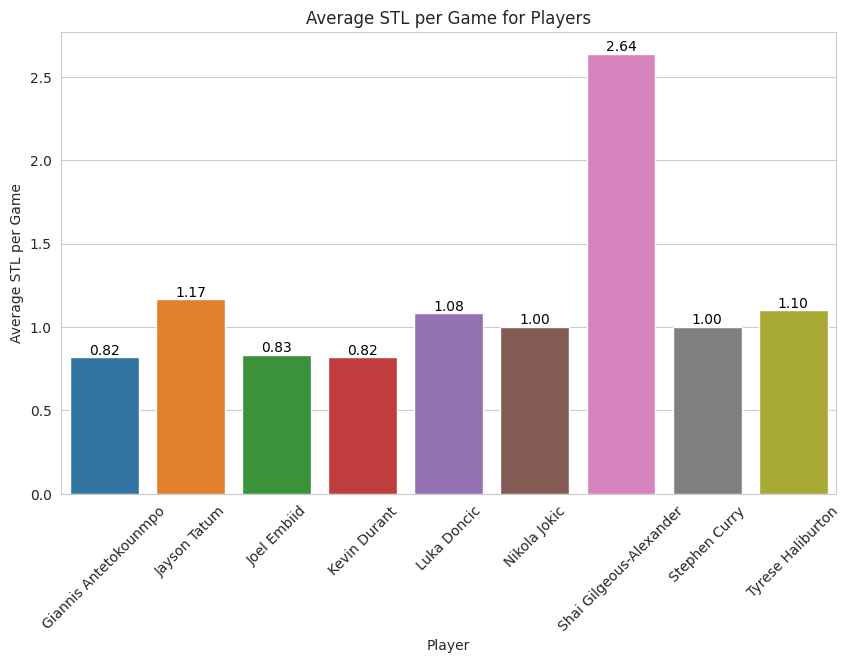

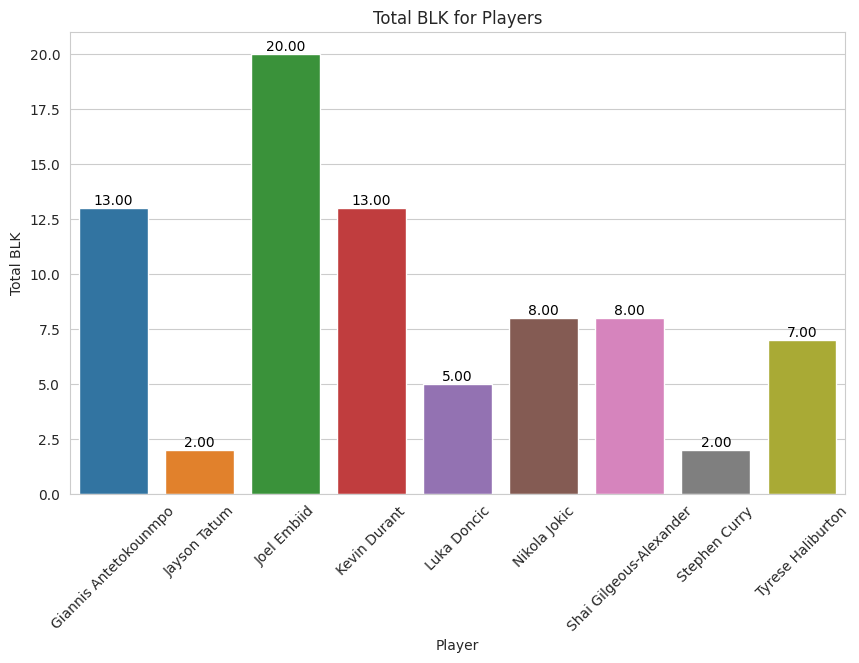

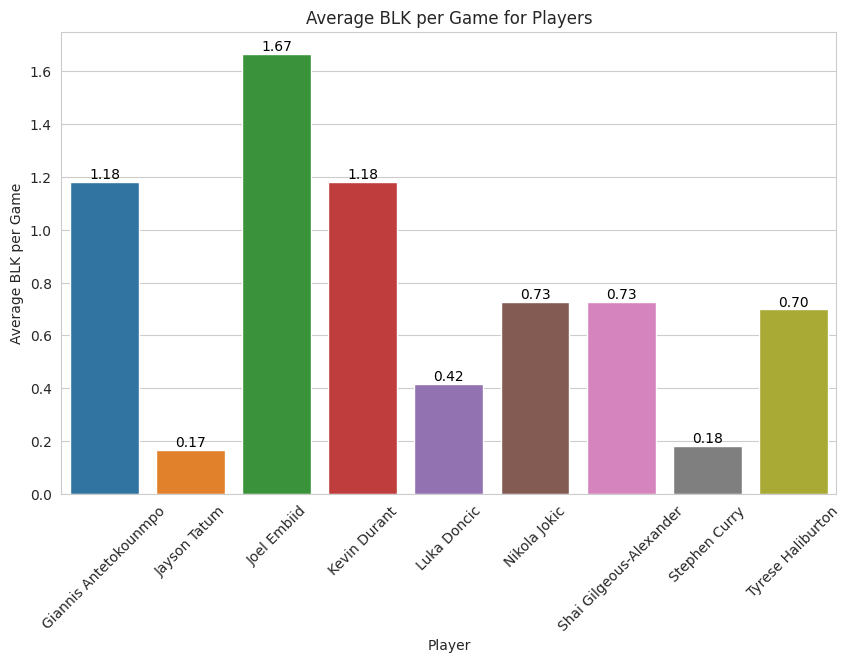

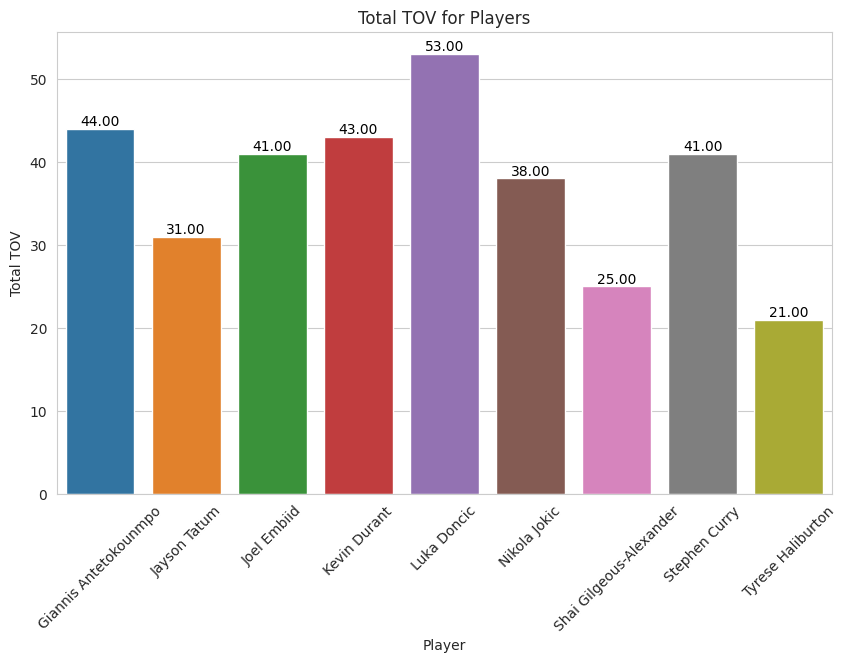

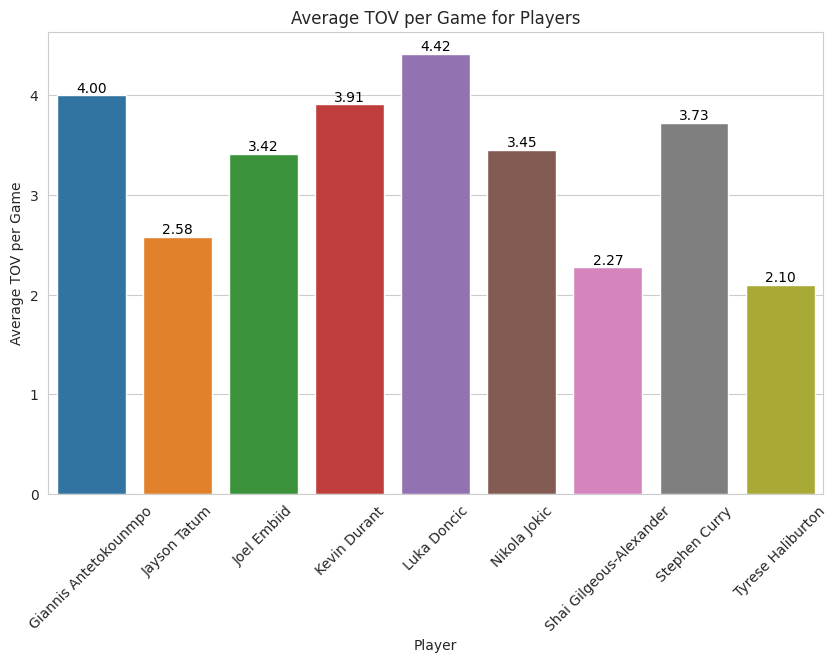

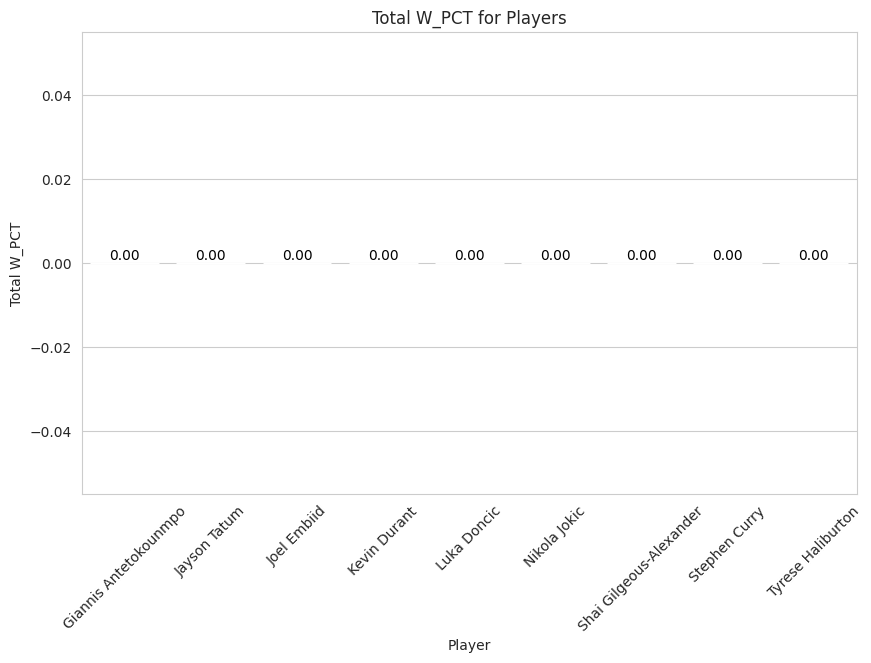

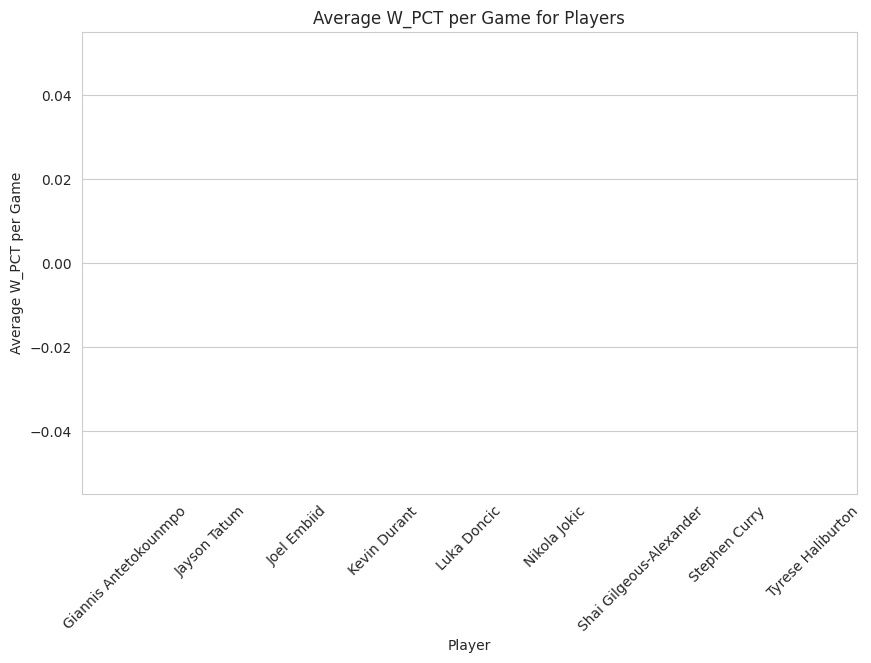

In [116]:
sns.set_style("whitegrid")


for col in numeric_cols:
    # Plot for Total Metrics
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=total_metrics, x='Player', y=col)
    plt.title(f'Total {col} for Players')
    plt.xticks(rotation=45)
    plt.ylabel(f'Total {col}')
    # Annotate each bar with its value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.savefig(f'{output_dir}/Total_{col}_for_Players.png')
    plt.show()

    # Plot for Average Metrics
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=average_metrics, x='Player', y=col)
    plt.title(f'Average {col} per Game for Players')
    plt.xticks(rotation=45)
    plt.ylabel(f'Average {col} per Game')
    # Annotate each bar with its value
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')
    plt.savefig(f'{output_dir}/Average_{col}_per_Game_for_Players.png')
    plt.show()